Link to Colab: https://colab.research.google.com/drive/1IjeLBGNfPuslCBqcaAQaWcOCMWlvQRer#scrollTo=8UAAS2xw4k4i

## Preparation

In [ ]:
pip install gdown==v4.6.3

In [ ]:
import os
import requests
import zipfile

# Create the target directory if it doesn't exist
target_directory = "data/CE"
os.makedirs(target_directory, exist_ok=True)

# Direct URL to the zip file
zips = ['https://opendata.justice-administrative.fr/DCE/2021/06/CE_202106.zip',
 'https://opendata.justice-administrative.fr/DCE/2021/07/CE_202107.zip',
 'https://opendata.justice-administrative.fr/DCE/2021/09/CE_202109.zip',
 'https://opendata.justice-administrative.fr/DCE/2021/10/CE_202110.zip',
 'https://opendata.justice-administrative.fr/DCE/2021/11/CE_202111.zip',
 'https://opendata.justice-administrative.fr/DCE/2021/12/CE_202112.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/01/CE_202201.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/02/CE_202202.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/03/CE_202203.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/04/CE_202204.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/05/CE_202205.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/06/CE_202206.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/07/CE_202207.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/08/CE_202208.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/09/CE_202209.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/10/CE_202210.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/11/CE_202211.zip',
 'https://opendata.justice-administrative.fr/DCE/2022/12/CE_202212.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/01/CE_202301.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/02/CE_202302.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/03/CE_202303.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/04/CE_202304.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/05/CE_202305.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/06/CE_202306.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/07/CE_202307.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/08/CE_202308.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/09/CE_202309.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/10/CE_202310.zip',
 'https://opendata.justice-administrative.fr/DCE/2023/11/CE_202311.zip',
        'https://opendata.justice-administrative.fr/DCE/2023/12/CE_202312.zip']

# Download the zip files
for zip_url in zips:
  zip_response = requests.get(zip_url)
  zip_filename = "downloaded_file.zip"
  with open(zip_filename, 'wb') as f:
      f.write(zip_response.content)

  # Unzip the file into the target directory
  with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
      zip_ref.extractall(target_directory)

  # Remove the downloaded zip file if needed
  os.remove(zip_filename)


In [ ]:
import gdown
# Google Drive URL for the .txt file
gdrive_url = "https://drive.google.com/uc?id=1-51EmCMxF6nlI5jb0XuPfWuwcMVXfHSd"
gdrive_url2 = "https://drive.google.com/uc?id=1HFPH4NuPJ0dAg3uuROjjFTP5PTTt_3X4"

# Create the target directory for .txt content if it doesn't exist
target_directory_txt = "/content"

# Download the .txt file into the target directory
gdown.download(gdrive_url, os.path.join(target_directory_txt, "poem.txt"), quiet=False)
gdown.download(gdrive_url2, os.path.join(target_directory_txt, "Example.pdf"), quiet=False)

!pip install pymupdf

Downloading...
From: https://drive.google.com/uc?id=1-51EmCMxF6nlI5jb0XuPfWuwcMVXfHSd
To: /content/poem.txt
100%|██████████| 1.73k/1.73k [00:00<00:00, 4.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HFPH4NuPJ0dAg3uuROjjFTP5PTTt_3X4
To: /content/Example.pdf
100%|██████████| 209k/209k [00:00<00:00, 50.8MB/s]


# Manipulating Files

This course is about data analysis, not software creating. You'll mostly use Colab or the Console, and won't
particularly need to write `.py` scripts, invent new classes, etc. Scripts can record methods and functions you invented, but most analyses are transient: you use it on the go, sometimes for a single task, and get to something else.

And yet, the data to be analysed needs to be stored. We'll now see the basics of this.

## Navigating Files

But first a word about how computers work. You've got memory: your hard drive. You've got RAM: Random
Access Memory, which is what your computer use to perform its basic tasks. There is a constant <i>va et vient</i>
between the two. When you create a new variable in the Console, it's stored in RAM; if you want to use it next time,
you need to store it in the secondary, hard memory.

You can do that through Python, but you need an interface between the code and your computer
environment. Fortunately, Python relies on the same kind of methods that are at the basis of most computers (since
they get their roots in the UNIX system). If you open the Command Prompt (`cmd` on Windows, or the Terminal on a Mac),
you can navigate between folders with the command `cd` (for "Change directory"), or create a new folder with `mkdir`.

Three commands in particular will be useful during this course:
<ul><li><b>os.getcwd()</b>, which means "Get Current Working Directory", outputs the current position of Python
within your files</li>
<li><b>os.chdir(x)</b>, which "changes dir" to the directory x you specify in argument (x needs to be a subfolder
of the current folder: you cannot directly change dir to a sub-sub-folder, for instance).</li>
<li><b>os.listdir(".")</b>, which returns a list of files in a directory (using the "." argument means: in the
current directory.)</li></ul>

(Note that the argument we gave to the listdir() method was ".", which usually means "this current folder", whereas
".." always means "parent folder".)

In [ ]:
import os

current_path = os.getcwd()
print(current_path)

os.chdir("..")
new_path = os.getcwd()
print(new_path)
print(os.listdir("."))  # We check what files and subfolders are in the folder

os.chdir("content")
print(os.listdir("."))

/content
['.config', 'poem.txt', 'Example.pdf', 'data', 'sample_data']


## Exercice

I downloaded a bunch of decisions from the Conseil d'Etat in a folder named `CE`, in the subfolder `sample data`, itself in the subfolder `content`. How many decisions are there ?

In [ ]:
os.chdir("data/CE")
var = os.listdir(".")
print(len(var))

18339


# Renaming Files

`os` is also very helpful to manipulate files from Python, for instance renaming them. Instead of spending hours
renaming hundreds of files (a common thing for junior lawyers), you can do it with the `os.rename(x, y)` method, which changes file x into y.

In [ ]:
file = "DCE_466461_20230918.xml"  # We select a file that is in the folder Data and attribute its name to a variable
newnamefile = file + "a"  # We decide on a new name to give that file
os.rename(file, newnamefile)
print("The new file list is: ", [x for x in os.listdir(".") if "DCE" in x])
os.rename(newnamefile, newnamefile[:-1]) # We repair what we did

The new file list is:  ['DCE_452262_20221213.xml', 'DCE_467442_20230609.xml', 'DCE_459884_20221228.xml', 'DCE_476064_20230921.xml', 'DCE_460448_20230210.xml', 'DCE_462245_20230629.xml', 'DCE_455280_20211230.xml', 'DCE_478962_20230821.xml', 'DCE_443699_20220524.xml', 'DCE_455801_20230713.xml', 'DCE_475526_20230717.xml', 'DCE_449496_20220131.xml', 'DCE_457071_20220602.xml', 'DCE_447477_20220204.xml', 'DCE_469809_20230616.xml', 'DCE_467701_20230731.xml', 'DCE_469794_20230816.xml', 'DCE_459801_20230428.xml', 'DCE_448161_20230724.xml', 'DCE_447339_20220721.xml', 'DCE_456397_20211027.xml', 'DCE_442184_20211007.xml', 'DCE_450109_20211026.xml', 'DCE_441118_20211122.xml', 'DCE_471239_20230525.xml', 'DCE_451979_20220923.xml', 'DCE_465263_20221222.xml', 'DCE_454759_20220721.xml', 'DCE_460975_20220928.xml', 'DCE_470897_20230214.xml', 'DCE_458503_20220519.xml', 'DCE_459262_20230217.xml', 'DCE_455823_20221102.xml', 'DCE_436274_20220722.xml', 'DCE_461329_20221205.xml', 'DCE_453200_20221227.xml', 'DCE

Note that the resulting file is now corrupted: you changed the extension from `txt` to `.txta`, which is unknown -
and so you can't read it anymore. There are ways to control for this, but this is the subject of the exercise.

 ## Exercices

1. Rename all DCE files with "Decision" (instead of DCE), and all ORCE files with "Ordonnance".

2. Count all decisions ("DCE") taken before September 16, 2023; do the same for all ordonnances ("ORCE").

3. Each decision has a case number, distinct from the date. Compute the total of all these case numbers. (Remember that you can change a string to a number with `int()`.)

In [ ]:
if 14 < 16:
  print("Oh")

Oh


In [ ]:
for file in var:
  if "DCE" in file:
    xxx = "Decision" + file[3:]
    os.rename(file, xxx)
  else:
    xxx = "Ordonnance" + file[4:]
    os.rename(file, xxx)

In [ ]:
file = os.listdir(".")[0]
print(file[-12:-4])

20231107


In [ ]:
"HEC" < 10

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
ii = 0
oo = 0
ll = []
ol = []

for file in os.listdir("."):
  if "Decision" in file:
    if int(file[-12:-4]) < 20230916:
      ii = ii + 1
      ll.append(file)
  elif "Ordonnance" in file:
    if int(file[-12:-4]) < 20230916:
      oo = oo + 1
      ol.append(file)
print("Number of decisions: ", ii)
print("Number of ordonnance:", oo)

Number of decisions:  9636
Number of ordonnance: 6251


In [ ]:
fred = 0

for file in os.listdir("."):
  cn = file.split("_")[1]
  cn = file[-19:-14]
  plouf = plouf + int(cn)
print(plouf)

# Load and Store data

Anyhow, back to storing data. The canonical way to do it in Python is by opening a file and storing it in a
variable. This variable (or object) comes with distinct methods, such as "read()" which returns the data inside the
file. Another method is "write()", which allows you to add to the existing data.

To create a new file, you'd use the with syntax `with open("your_file_name.txt", "a") as f:`; and then, in the
indented part of the code, you use the "write()" method of the "f" object to add your text to the data.
Note the "a"argument, which means that you want to both read and write in the file (you could input "r" only for reading, or "w" only for writing).

*** You may want to learn a bit about encoding, and the <a href="https://nedbatchelder.com/text/unipain.html">Unipain</a>***

In [ ]:
"HEC" 2

In [ ]:
f = open("/content/poem.txt", encoding="latin1")
poem = f.read()
print(poem)
f.close()

with open("/content/poem2.txt", "a", encoding="utf8") as f:
    f.write(poem)

os.listdir("/content")  # We check that we indeed saved a new "poem2" file in the Data folder

The Frivolous Cake
1.1  A freckled and frivolous cake there was
1.1  That sailed upon a pointless sea, 
1.2  Or any lugubrious lake there was
1.3  In a manner emphatic and free.
1.4  How jointlessly, and how jointlessly
1.5  The frivolous cake sailed by
1.6  On the waves of the ocean that pointlessly
1.7  Threw fish to the lilac sky.

2.1  Oh, plenty and plenty of hake there was
2.1  Of a glory beyond compare, 
2.2  And every conceivable make there was
2.3  Was tossed through the lilac air.

3.1  Up the smooth billows and over the crests
3.1  Of the cumbersome combers flew
3.2  The frivolous cake with a knife in the wake
3.3  Of herself and her curranty crew.
3.4  Like a swordfish grim it would bounce and skim
3.5  (This dinner knife fierce and blue) , 
3.6  And the frivolous cake was filled to the brim
3.7  With the fun of her curranty crew.

4.1  Oh, plenty and plenty of hake there was
4.1  Of a glory beyond compare -
4.2  And every conceivable make there was
4.3  Was tossed through 

['.config', 'poem.txt', 'poem2.txt', 'Example.pdf', 'content', 'sample_data']

This is text data, arguably the most straightforward type of data to handle. As we'll see in the next
task, however, a lot of what you'll be handling is structured data: either in marked-up format (XML, HTML), or in
some kind of spreadsheet. You probably know Excel's native `.xls` format for spreadsheet, but there are plenty
others, and a good deal of data analysis relies on a simple format called `.csv` - which stands for comma-separated
value.

Depending on what you do, you might not need to rely on these methods much: we'll see at some point
how to handle data with pandas, which has its own, more straightforward methods to save and load data. Likewise, XML
tools in Python typically have their own methods.

# PDFs

Beyond text, .csv, and structured content, data is sometimes enclosed in .pdfs. Now, this is an issue: .
pdfs are not meant for data analysis, their (main) interest, and the reason why they have been invented, is to be a
format that preserves a maximum the appearance of a file, on all platforms. But this is not a data-friendly format.

Unfortunately, a lot of data out here is found in .pdfs, so you'll have to wrestle with them to extract their data.
For this, you'll need to use a third-party library dedicated to .pdfs files, such as `pyPDF2` or `pdfminer`. But the
principle is the same: you open your .pdf and store it in an object, and then you use methods from this object (they
would differ depending on the package used) to obtain the data you are interested in.

In [ ]:
import fitz  # PyMuPDF, called fitz for legacy reasons

pdf = fitz.open("/content/Example.pdf")  # Open the .pdf file
num_pages = pdf.page_count
text = ""

for page in range(0, num_pages):
    page_obj = pdf.load_page(page)
    text += page_obj.get_text("text")  # Extract text from the page

print(text[:500])  # Display the first 500 characters of the extracted text


 
 
INTERNATIONAL COURT OF JUSTICE 
Peace Palace, Carnegieplein 2, 2517 KJ  The Hague, Netherlands 
Tel.: +31 (0)70 302 2323   Fax: +31 (0)70 364 9928 
Website   Twitter   YouTube   LinkedIn  
 
 
Press Release 
Unofficial 
 
 
 
 
No. 2021/35 
 
7 December 2021 
 
 
 
Application of the International Convention on the Elimination of All Forms  
of Racial Discrimination (Azerbaijan v. Armenia) 
 
The Court indicates provisional measures to protect certain rights claimed  
by Azerbaijan and order


# XML and Structured Files

When you want to store and work with data, pure text is not very helpful; for a start, pure text usually does not include the formatting (bold, italic, etc.), and contains no info as to the role of a particular part of the text (for instance, in a judgment, the difference between the arguments of the parties, the reasoning, or the <i>dispositif</i>.

The solution here is to store your text into a file that follows a structure, according to a particular language. XML, for "Extensible Markup Language", is a structured language. HTML is another.

Likewise, a `.docx`, when you go into the details, is actually a text file with a layer of structure that tells Microsoft words a number of information as to the formatting of that text. Here is an example of the difference between the two: this
is the same part of a MSWord document, except the second is the internal .xml structure (after a bunch of
manipulations on my part to make it somewhat readable).

![](../Data/Images/img_1.png)
![](../Data/Images/img.png)

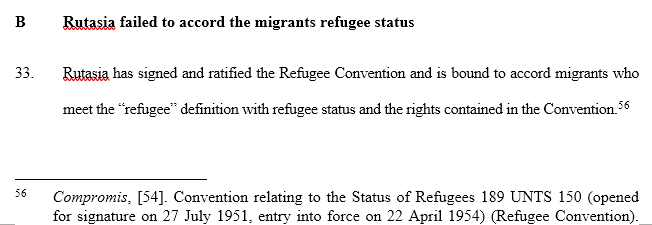

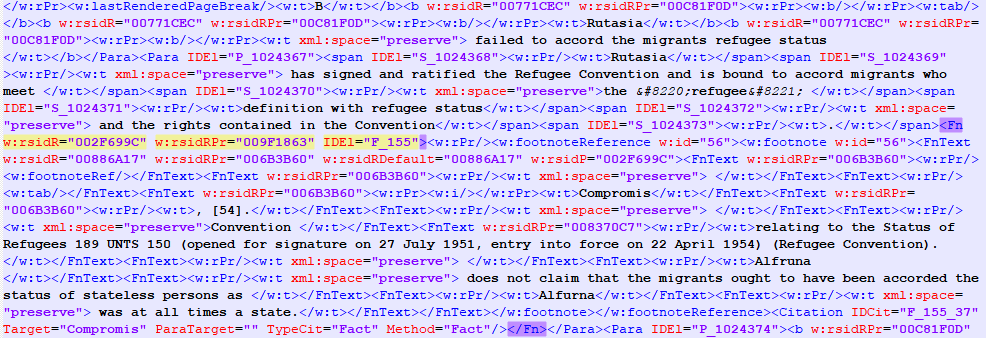

So back to .xml. In your Files, we have a number of decisions by the Conseil d'Etat released as part of their <a href="https://opendata.conseil-etat.fr/">Open Data program</a>. They are .xml files. They are not great, but they'll do.

Let's have a look at one of these files, as it appears if you open it with a browser. You can see that the main text is divided between what we call elements. Each element includes an opening `tag` (or "balise", in French), which must be accompanied by a closed tag of the same name. Tags and sections cannot overlap: when you open a tag in a context,
you need to close it in that context. (You can also have self-standing, one-tag elements, of the form <tag/>, though they are rarer.)

![](../Data/Images/img_3.png)

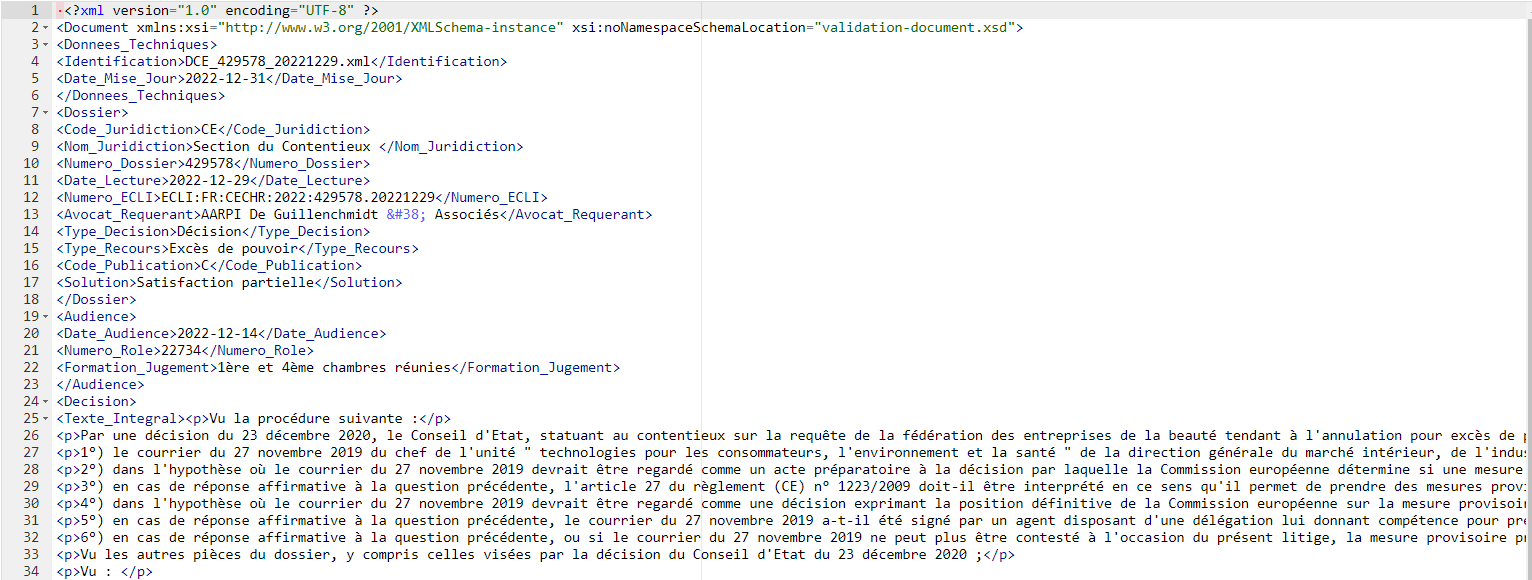

The documents from the Conseil d'Etat don't have much of those, but normally you can specify further `attributes` for each element: these are data points that will not be seen by a natural reader (unless you look at the code directly), but enclose
further information (such as formatting, or a URL for a link) for the software, or data scientist, who is probing this
data. A good example is the <code>\<a></a></code>, which represents a link, and always has an attribute `href`, which
is the url:

<code>
\<\a href="My URL Here">My link here\<\/a>  # The antislash here was added, so that you can see the structure;
otherwise the element would not appear
</code>

You can also see, hopefully, that the information is enclosed in a hierarchical format, like a tree: you start with
the <i>root</i>, and then you get branches that can get branches of their own, etc. Here everything is enclosed in a
`Document` element, itself part of an`xml` element. Yet `Document` has only four direct children, which themselves
have further children.

![](../Data/Images/img_2.png)

"Children" is the usual term, though "descendants" is also sometimes used. Logically, you also have "parents" or
"siblings".

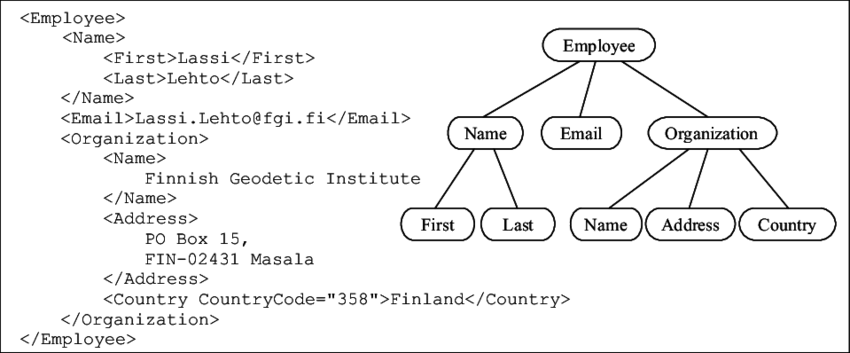

The interest of storing data in a structured format is not only that you can include more than data (such as metadata), but also that, once you know the structure, you can extract data efficienty from all files that follow that format. The Conseil d'Etat decided a few years ago to release all their judgments according to that format, and code that worked to extract data from judgments back then also works for new judgments - as long as they follow the structure.

In other words, just like using a loop over the content of a list allows you to be agnostic about the data in that list, having a structure allows you to be agnostic about the data that was filled in that structure.

For instance, Let's say we want to collect all dates from these decisions from the Conseil d'Etat. Instead of searching
each text for a date, the .xml format is helpful: we can see that the date is enclosed in an element called
`Date_Lecture`. We can just iterate over all files, and collect the dates.

The first thing to understand is that when you parse an .xml document, you need to start from the root. From there, you typically iterate over their descendants, sometimes by specifying a condition: for
instance, we can look for all `<p>` elements, which represent the paragraphs. You also have various levels of
iterations: over siblings, children, or ancestors. Another alternative is to go through  all descendants and check
if they are of the required type.

In [ ]:
import pandas as pd
from lxml import etree  # This is one of the main .xml reader module in Python,
# the etree method from the lxml package. You need to : pip install lxml
import os
from datetime import datetime
from collections import defaultdict, Counter

os.chdir("/")
os.chdir("content/data/CE")  # We go to the main folder that stores all files
files = os.listdir(".")
print(len(files))  # There are many files !

file = files[0] # Let's work on the first file to get an example

xml_file = etree.parse(file)  # We first open the .xml file with the "parse" method
root = xml_file.getroot()  # We then look for the "root" of the XML tree, and pass it to a variable root

print(root)  # You can check the attributes of every element this way
print("Text of the element: " + root.text)  # Likewise, the "text" attribute gives you the text inside an element;
# root has no text, as you can see everything is in the elements instead

18340
<Element Document at 0x7e35870519c0>
Text of the element: 



In [ ]:
print(root)
root.text

<Element Document at 0x7e35c822a840>


'\n'

Now, starting from the root, we can go through all its children and grandchildren. There are several ways to do this.

In [ ]:
os.listdir(".")
for child in root: # The parent element also works as a list of its children element, so you can easily iterate over it immediately like this
    print(child.tag, ":", child.text)
    for subchild in child:
      print(subchild.tag, ":", subchild.text)

Donnees_Techniques : 

Identification : DCE_451817_20230509.xml
Date_Mise_Jour : 2023-05-26
Dossier : 

Code_Juridiction : CE
Nom_Juridiction : Section du Contentieux 
Numero_Dossier : 451817
Date_Lecture : 2023-05-09
Numero_ECLI : ECLI:FR:CESEC:2023:451817.20230509
Avocat_Requerant : SCP BUK LAMENT - ROBILLOT
Type_Decision : Décision
Type_Recours : Excès de pouvoir
Code_Publication : C
Solution : Rejet
Audience : 

Date_Audience : 2023-04-14
Numero_Role : 23255
Formation_Jugement : Section du Contentieux
Decision : 

Texte_Integral : None


In [ ]:
for paragraph in root.iter("Identification"):  # Though a better way to do it is with iter();
    # this command takes arguments that allow you to filter the descendants
    print(paragraph.tag) # This will return the text of the decision, paragraph by paragraph
    print(paragraph.text)

Identification
DCE_451817_20230509.xml


In [ ]:
for el in root.iter(["Numero_Dossier", "Date_Lecture"]):  # The filter can also be a list of relevant element names
    print(el.text)

451817
2023-05-09


Note also that you can navigate between the elements, to jump from elements to their parents, or siblings. This is very helpful if you know the tag of one element but aren't sure of what follows it; or if you want to work on several elements in line.

In [ ]:
for el in root:
    pass  # An empty loop to make sure "el" is the last child of root
print("The last child of root is: ", el.tag)

prev_el = el.getprevious() # This method gets you the previous sibling
print(prev_el.tag)
next_el = prev_el.getnext()
print(next_el.tag)
subel = root.getchildren()[1]
print("The second child from the root is: ", subel)
print("Its parent is", subel.getparent())

The last child of root is:  Decision
Audience
Decision
The second child from the root is:  <Element Dossier at 0x7e3587091080>
Its parent is <Element Document at 0x7e35c822a840>


In [ ]:
root.getchildren()

[<Element Donnees_Techniques at 0x7e3587092840>,
 <Element Dossier at 0x7e3587091080>,
 <Element Audience at 0x7e3587093cc0>,
 <Element Decision at 0x7e359d1f9e00>]

Now, coming back to our example, we want to get the date for every decision. Note that if we want to do it for one file, we just need to find the relevant element (tag = "Date_Lecture"), and extract the data from that element.

In [ ]:
for el in root.iter("Date_Lecture"):  # the Date_Lecture element contains the judgment's date;
    # Easiest way in XML is to filter all descendants to get only the one we are interesting in
    date = el.text
print(date)

2023-05-09


Therefore, to obtain it from all judgments, we just need to loop over all files.

In [ ]:
files = os.listdir(".")
for file in files[:10]:  # Looping only over the first 10
    xml_file = etree.parse(file)  # We open each .xml file with the "parse" method
    root = xml_file.getroot()  # And we goot the root
    for el in root.iter("Date_Lecture"):  # the Date_Lecture element contains the judgment's date;
    # Easiest way in XML is to filter all descendants to get only the one we are interesting in
        date = el.text
    print(date)

2023-05-09
2021-11-29
2021-12-30
2022-06-23
2023-01-11
2023-07-11
2022-05-10
2023-12-21
2022-12-28
2023-02-03


## Exercise

Adapt the previous algorithm to find the most common "Type_Recours" for all decisions in the folder (use the Counter module).

'/content/data/CE'

In [ ]:
from collections import Counter

cc = Counter(["cake", "cake", "cake", "knife", "knif"])  # An example of using a counter
cc.most_common(1)
ll = []

# Your code here
files = os.listdir(".")
for file in files:  # Looping only over the first 10
    xml_file = etree.parse(file)  # We open each .xml file with the "parse" method
    root = xml_file.getroot()  # And we goot the root
    for el in root.iter("Type_Recours"):  # the Date_Lecture element contains the judgment's date;
    # Easiest way in XML is to filter all descendants to get only the one we are interesting in
        date = el.text
        ll.append(date)

print(ll)


In [ ]:
cc = Counter(ll)
cc.most_common(5)

[('Excès de pouvoir', 9711),
 ('Plein contentieux', 7435),
 ('Autres', 221),
 ('Recours en révision', 123),
 ('Contentieux des pensions', 113)]

# From XML to a DataFrame

Now, if we wanted to recreate a full database of all relevant data points in each judgment, we can just use the list of list method.
This methods leverages the fact that  a dataframe is nothing but a list of sublists of equal length, with each sublist being a row (see <a href="https://www.geeksforgeeks.org/creating-pandas-dataframe-using-list-of-lists/">here</a> for more details).

In [ ]:
details = ["Numero_Dossier", "Date_Lecture", "Date_Audience", "Avocat_Requerant", "Type_Decision", "Type_Recours",
"Formation_Jugement", "Solution"]  # All the relevant data points/elements in our judgments
lists_details = []  # Easiest way to create a dataframe is first to have a list of lists,
# and then pass it to pd.Dataframe(lists, columns=details)

for file in files:
    newlist = []  # We create a new, empty sublist, every time we switch to a new file;
    # that sublist will be filled with relevant data and added to main list; each sublist will have the same length
    XML = etree.parse(file)
    root = XML.getroot()

    for detail in details:  # For each file, we iterate over each type of detail, using a loop
        result = ""
        for el in root.iter(detail):  # and we use this detail to filter from all descendants in root
            result = el.text
        newlist.append(result)  # we then pass the result to the sublist created above

    lists_details.append(newlist)  # Before the loop concludes with one file and passes on to the next,
    # we append the (filled) newlist to main list

df = pd.DataFrame(lists_details, columns = details)  # Out of the loop, we create a dataframe based on that list of lists
df.head(10)
# df.to_clipboard(index=False) # Finally, we copy the DataFrame so as to paste it (CTRL+V) in Excel

,Numero_Dossier,Date_Lecture,Date_Audience,Avocat_Requerant,Type_Decision,Type_Recours,Formation_Jugement,Solution
0,465521,2022-10-26,,KOUVELA PIQUET,Ordonnance,Excès de pouvoir,Formation spécialisée,R. 122-12-4 Rejet irrecevabilité manifeste
1,473752,2023-06-01,,,Ordonnance,Excès de pouvoir,6ème chambre,R.822-5 Rejet PAPC défaut ministère avocat
2,457143,2022-03-29,2022-03-17,"SAS BOULLOCHE, COLIN, STOCLET ET ASSOCIÉS;SCP ...",Décision,Excès de pouvoir,6ème chambre jugeant seule,QPC M-Refus transmission (ADD)
3,456898,2021-10-12,,,Ordonnance,Excès de pouvoir,2ème chambre,
4,467802,2023-02-15,,"SCP LYON-CAEN, THIRIEZ",Ordonnance,Excès de pouvoir,7ème chambre,R.822-5-1 Rejet PAPC série
5,441653,2021-10-22,2021-10-01,CABINET BP ORSAY,Décision,Excès de pouvoir,3ème et 8ème chambres réunies,
6,435632,2021-12-27,2021-11-29,LE PRADO,Décision,Plein contentieux,5ème et 6ème chambres réunies,Avant dire-droit
7,457991,2022-03-07,,,Ordonnance,Excès de pouvoir,6ème chambre,R. 122-12-6 Rejet série
8,454487,2022-03-18,,,Ordonnance,Plein contentieux,5ème chambre,R.822-5 Rejet PAPC pourvoi non fondé
9,430443,2021-12-08,,"THOUVENIN, COUDRAY, GREVY",Ordonnance,Plein contentieux,3ème chambre,R. 122-12-6 Renvoi cassation série


In [ ]:
len(df)

16054

In [ ]:
df.Type_Recours.value_counts()

Excès de pouvoir                  8511
Plein contentieux                 6702
                                   318
Autres                             192
Recours en révision                116
Contentieux des pensions            98
Rectif. d'erreur matérielle         69
Exécution                           27
Appréciation de la légalité         21
Récusation                          13
Recours en interprétation            5
Action en astreinte                  4
MAGIERA                              2
Recours ds l'intérêt de la loi       1
Interprétation                       1
Name: Type_Recours, dtype: int64

# Dates and xPath

Before turning to scraping, two important points that fit nowhere else. For both, we will use a decision from the Conseil d'Etat.

## xPath

We saw how to locate an element by filtering all children from the root with the <code>.iter()</code> method. Yet, this is not the easiest way to locate an element when you really need it. Instead, you need to use yet another syntax, called xpath. You can read more about xPath
<a href="https://www.w3schools.com/xml/xpath_syntax.asp">here</a>. It works like this:

<ul><li>You first identify where to find the required element. You typically start from the source element
(represented by a dot <code>.</code>), then use one slash if you want to search in the immediate children, or two slashes
(<code>//</code>) if you need to search in the entire tree;</li>
    <li>Then you specify the name of the element, or <code>*</code> if any would do;</li>
    <li>And then you add conditions, in brackets, such as the value of an attribute (introduced by a <code>@</code>),
or based on other functions (such as whether the element contains a certain text);</li>
<li>You can also directly looked for all "x" elements (will return a list of those);</li>
    <li>Finally, xpath comes with a number of functions, such as <code>contains()</code> (allows you to check that
the object contains a certain text);</li>
    </ul>

For instance, if we needed to find the element `Date_Lecture` in the xml_file, this is what the xPath expression
would look like: `root.xpath(".//Date_Lecture") `.

Xpath method Returns a list, be careful about this ! If you expect only one element, you can immediately index it, as below.

In [ ]:
import os
from lxml import etree

file = os.listdir(".")[0] # We take the first file from the CE folder

xml_file = etree.parse(file)  # We first open the .xml file with the "parse" method
root = xml_file.getroot()  # We then look for the "root" of the XML tree, and pass it to a variable root

numero_dossier = root.xpath(".//Numero_Dossier")[0]  # We search for the element Numero Dossier starting from the root
# (which is the "." here)
print("Le numéro de dossier est: ", numero_dossier.text)

paras = root.xpath(".//*[contains(text(), 'Article')]")  # Looking for all elements whose text contains the term "Article"
for para in paras:  # We can loop since xPath always returns a list!
    print(para.text)

Le numéro de dossier est:  487622
Article 1er : La requête de M. A est rejetée.
Article 2 : La présente ordonnance sera notifiée à M. B, au ministre de l'intérieur et des outre-mer et à la Première ministre.


## Dates

Python has a data format called datetime, which deals with dates. Dates can be text; in some cases, they can be
numbers (e.g., a year); but they are most useful when they are of the type "datetime", since they then come with useful methods.

To transform a text into a datetime object, you need to parse it. The datetime module has a function <code>strptime</code> that detects time according to a pattern. You can look for days, months, quarters, minutes, etc. For instance, the symbol "%Y" means the full year written as four consecutive digits (e.g., in regex, \d\d\d\d). The full syntax is available <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes">here</a>.

Once you have that datetime object, you can act on it, for instance extract the month in the attributes.

In [ ]:
from datetime import datetime # The relevant module in the package datetime is also called datetime ...

print(datetime.today())  # datetime knows what date it is today

date = root.xpath(".//Date_Lecture")[0] # We get the date of our decision
print(date.text)

parsed_date = datetime.strptime(date.text, "%Y-%m-%d")  # The function strptime allows you to read a text (first argument),
# and if it matches the pattern in second argument, you will create a datetime object (parsed_date here).
print(parsed_date.day)  # The day attribute knows the day number (in the month)

2024-01-18 11:08:10.640162
2022-10-27
27


But more importantly, datetime objects allow you to reformat a date according to your needs - again, using a pattern.

In [ ]:
full_date = parsed_date.strftime("%A %d %B %Y")  # Your datetime object can then be transforme (strftime) into a more
# pleasant date format, again using a pattern. Note that datetime know what day of the week that date was !
print(full_date)

date.set("date", full_date)  # Let's add the full date as an attribute to our date element

new_date_el = root.xpath(".//Date_Lecture[@date='" + full_date + "']")[0]  # And now we can use xPath to find this element
# with the attribute (which we just added)
print("The element's attribute date: ", new_date_el.get("date"))

Thursday 27 October 2022
The element's attribute date:  Thursday 27 October 2022


# Dataframes

A lot of the analyses you'll be asked to perform will be based on a dataframe, i.e., a spreadsheet where
data is structured in rows and columns.

There are other ways to store, access, and exploit data, but
usually even that data is at one point converted into a dataframe, over which you'll perform (and record) your analyses.

The main and most popular module in Python for dataframes is called `pandas`, and frequently abbreviated
as `pd`. Think of pandas in this context as an equivalent of Microsoft Excel - except
infinitely more flexible (though you can do much more with Excel if you learn VBA, the language powering it).

We'll introduce you very softly to pandas today, keeping most of the heavy work for another lesson - but you'll need
the basics to properly follow through the lessons on Scraping, for instance.

We already created a dataframe above, which we can save as a `.csv` file.

Once saved, we can then load the file with pandas, which makes it easy for you for a dedicated `read_csv` function.

In [ ]:
import os
import pandas as pd  # We import pandas
from matplotlib.pyplot import plot  # We also import a module to create graphs and plots
import regex as re

os.chdir("/content/content/data")
df.to_csv("CE.csv", index=False, encoding="utf8")

df = pd.read_csv("CE.csv", header="infer")  # We load it
df = df.fillna("")  # It is common to fill the "empty" cells (which are cast as "NaN", or "Not a Number",
# replacing them with an empty string instead ("").
# This is to facilitate comparisons (as you can't compare a string to a NaN)

Then we can do a bit of data investigation, see what's the most interesting column or data, etc. One first useful tool is the `.value_count()` method, which allow you to see the rough distribution of a variable.

Index(['Numero_Dossier', 'Date_Lecture', 'Date_Audience', 'Avocat_Requerant',
       'Type_Decision', 'Type_Recours', 'Formation_Jugement', 'Solution'],
      dtype='object')
0         Excès de pouvoir
1         Excès de pouvoir
2         Excès de pouvoir
3         Excès de pouvoir
4         Excès de pouvoir
               ...        
16075    Plein contentieux
16076    Plein contentieux
16077                     
16078    Plein contentieux
16079    Plein contentieux
Name: Type_Recours, Length: 16080, dtype: object


<Axes: >

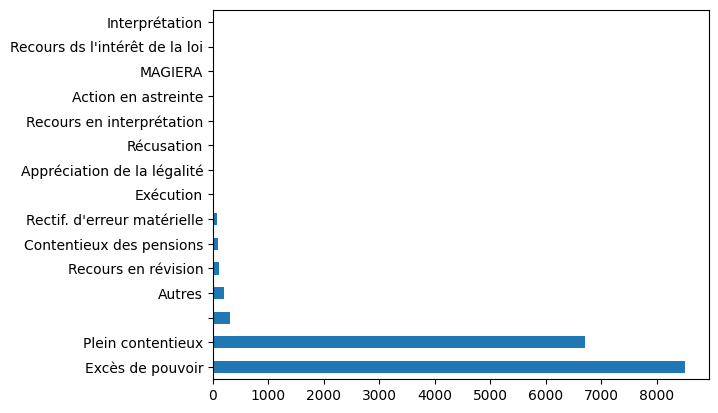

In [ ]:
df.head(5)
print(df.columns)
print(df["Type_Recours"] ) # You access a particular column by indexing it this way (we'll see further indexing in a few weeks)
df["Type_Recours"].unique()  # Functions such as Unique renders a list of all possible values in a given column
df["Type_Recours"].value_counts()  # One of the most useful functions returns a count of all values
df["Type_Recours"].value_counts().plot(kind='barh')  # And now we can plot it with a bar chart

Like lists and dictionaries, a pandas object is a collection of data, and you may want to index it to find a particular data point. The methods are a bit different however.

To get a single value, you can use the method `.at`, which takes two arguments: the row number, and the column index.

In [ ]:
print(df.at[0, "Type_Recours"])  # This returns the value of the column "Type_Recours" for the first line of the df
print(df.at[20, "Avocat_Requerant"]) # The value for the column "Avocat_Requerant" for the 10th line

Excès de pouvoir



More commonly, Pandas objects have a method `.loc`, which returns a slice of the dataframe based on a condition (which should be True), or `.at` to get a particular cell if you know its index.

In [ ]:
ddf = df.loc[df.Formation_Jugement == "Juge des référés"]  # Filtering the dataframe to focus on all rows where the formation of
# judgment is the "Juge des Référées
len(ddf)

351

Again like with a list, you may want to loop over a dataframe to work on every data point one after another. Iterating over a dataframe is generally done with the help of the method `iterrows` - which provides you with two elements (index, and a row that can be indexed with column names).

In [ ]:
for index, row in df[:15].iterrows(): # We limit the loop to the first 15 rows
    print(index, row["Formation_Jugement"], row["Avocat_Requerant"])

0 Formation spécialisée KOUVELA PIQUET
1  6ème chambre 
2  6ème chambre jugeant seule SAS BOULLOCHE, COLIN, STOCLET ET ASSOCIÉS;SCP DUHAMEL - RAMEIX - GURY- MAITRE
3  2ème chambre 
4  7ème chambre SCP LYON-CAEN, THIRIEZ
5 3ème et 8ème chambres réunies CABINET BP ORSAY
6 5ème et 6ème chambres réunies LE PRADO
7  6ème chambre 
8  5ème chambre 
9  3ème chambre THOUVENIN, COUDRAY, GREVY
10  4ème chambre jugeant seule SCP BAUER-VIOLAS, FESCHOTTE-DESBOIS, SEBAGH
11 3ème et 8ème chambres réunies 
12  7ème chambre jugeant seule 
13  6ème chambre jugeant seule 
14  4ème chambre SCP RICHARD


Keeping track of the index is very useful, if you want to change the value of a column, or populate a new column, as in the example below.

This is what is meant by "enriching" the data, using it to derive further measures or indicators.

In [ ]:
df["Empty_Col"] = "" # Creating new column with empty text
df["New_Col"] = df["Formation_Jugement"].str.replace("jugeant seule", "").str.strip()  # creating new column with
#  data from another column, except we changed all strings (str) with empty text, and then stripping

df["Mixed"] = False # Another new column, with only False datapoints for now
for index, row in df.iterrows(): # We loop over the dataframe
    if re.search("r.unies", row["Formation_Jugement"], re.I):  # We check that the formation is made of chambres réunies
        df.at[index, "Mixed"] = True  # If this is the case, we reassign the column Mixed at the relevant index with True

df.Mixed.value_counts()

False    14254
True      1799
Name: Mixed, dtype: int64

Finally (for now), note that you can always put your dataframe in the clipboard (i.e., a CTRL+C) so as to paste it (with CTRL+V) in a normal excel or csv file.

In [ ]:
df.to_clipboard(index=False) # Does not work for Colab, though
# But keep it in mind for when you'll use Python on your laptop

## Exercise

There is a limited group of lawyers who can appear before the CE. Is there a specialisation in this respect between Référés and other cases ?

In [ ]:
# Your code here